# <center><font color=b>**Livrable 4 : Modélisation numérique**</font> 
    
![Onde sonore](https://developer.huawei.com/images/AI/HiAI-Engine/spectral-super-resolution/_840_480.jpg)
  
## PROJET : ESCAPE NO GAME
    
**Groupe B2b :** 
 - **Lesage Hugo**
 - **Soret Sény**
 - **Maret Eloi**
 - **JAFFRES Jérémy**                                              
    
**Tuteur : VICTOR Guillaume**
    
  ###### CPI A1 Traitement du Signal, 16 décembre 2021 

# <font color=b>Table des matières</font>

* <font color=b>Introduction</font>
    
    
* <font color=b>1. Phase d'émission</font>
    
    * <font color=b>1.1 Conversion du message en ascii puis en binare</font>    
    * <font color=b>1.2 Création du bit de parité</font>    
    * <font color=b>1.3 Création de la trame</font>    
    * <font color=b>1.4 Création du controle de redondance cyclique</font>  
    * <font color=b>1.5 Encodage de la trame avec le manchester</font>  
    * <font color=b>1.6 Modulation au choix ASK ou FSK</font>  

* <font color=b>2. Phase de réception</font>
    
    * <font color=b>2.1 Filtrage du signal recu par un filtre passe-bande</font>    
    * <font color=b>2.2 Démodulation ASK ou FSK</font>    
    * <font color=b>2.3 Décodage du signal en manchester</font>    
    * <font color=b>2.4 Récupération de la trame après décodage</font>  
    * <font color=b>2.5 Controle de redondance cyclique à la réception</font>  
    * <font color=b>2.6 Récupération du message de la trame</font> 
    * <font color=b>2.7 Vérification de l'intégriter du message avec le bit de parité</font> 
    * <font color=b>2.8 Conversion du message binaire en chaine de caractère</font> 
    
* <font color=b>3. Conclusion</font>    
    * Bilan individuel
    

## <font color=b>**Introduction**</font>
    
### <font color=b>**Contexte**</font>   
Après avoir localisé __l'organisation de cyber pirate__ du web à l'aide de signaux réseaux, __l'agent K57__ infiltré est resté bloqué dans la salle d’audioconférence, n'ayant à sa disposition qu'un __microphone__ branché au système d'audioconférence uniquement connecté au réseau lors de l'utilisation de la salle. Nous devons à tout prix prendre contact avec lui à l'aide de son __pad miniature spécial espion__, afin qu'il puisse récupérer les données de l'organisation de cybercriminalité, qui seront directement captés par le micro et envoyés dans le réseau.  

Pour cela, l'agent K57 doit nous véhiculer un message en toute discrétion à l'aide d'un __signal non audible__. Le pad est capable d’émettre un signal à des __hautes fréquences__ contenant les informations à transmettre. Lorsque le message est reçu à l’agence, il doit être traité afin de __décrypter__ le message codé. Ainsi, nous devons donc réaliser le __filtrage d'un signal numériquement__.
    
### <font color=b>**Livrables attendus**</font> 
Il est attendu que nous créons le programme de toutes les manipulations du signal en Python pour simuler la communication et démontrer la faisabilité de notre solution, c’est-à-dire de comment évolue le signal émis par l’agent et comment il est véhiculé. 

    
---

In [1]:
"""IMPORTATION DES BIBLIOTHEQUES"""

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read,write
from IPython.display import clear_output
import sounddevice as sd
from scipy.signal import periodogram

# 1. PHASE D'EMISSION

Il s'agit de l'endroit où nous allons écrire nottre message à transmettre.

In [2]:
# Message à envoyer à l'agence.
# L'instruction input() permet de à l'utilisateur d'entrée son message.

message_envoie = str(input("Veuillez entrer votre message (5 à 10 caractères) :"))

#Vérification des conditions (tant que notre message n'est pas entre 5 et 10 caractères, nous restons dans la boucle).

while not 5 <= len(message_envoie) <= 10:
    clear_output()
    message_envoie = str(input("Veuillez entrer votre message (5 à 10 caractères) : "))

Veuillez entrer votre message (5 à 10 caractères) :Atable


## 1.1 CONVERSION DU MESSAGE EN ASCII PUIS EN BINAIRE

In [3]:
text_to_binary = ""  # variable qui stockera mon message binaire en chaine de caractère.
for x in message_envoie: 
    # - l'instruction bin() convertit un nombre entier en binaire dans une chaîne.
    # - l'instruction ord() renvoie le valeur représentant l’unicode d’un caractère spécifié.
    # - l'instruction .zfill() ajoute des zéros au début de la chaîne, jusqu'à ce qu'elle atteigne la longueur spécifiée.
    text_to_binary += bin(ord(x))[2:].zfill(8)  # Convertion de chaque caractères de notre mesage en binaire et concaténation.   

message = []
message[:] = text_to_binary #Ajoute chaque caractère du tableau un à un dans un tableau message.
message_tab = [0 if i=="0"else 1 for i in message] # Remplacement des éléments du tableau "message" qui était sous la forme de chaine de caractère par des entiers "1" ou "0" dans le tableau "message_tab".
print("Conversion du message en binaire:",message_tab)

Conversion du message en binaire: [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]


## 1.2 BIT DE PARITE

Nous allons utliser le controle de parite afin de s'assurer que le message sera bien dans son intrégaliter lors de la réception.
Le principe est le suivnat : il compte le nombre de 1 définis dans chaque groupe de sept bits. Si le nombre de 1 défini est pair, il défini le bit de parité sur 1 sinon si le nombre de 1 défini est impair, il défini le bit de parité sur 0. 

In [4]:
#On initialise nos variables c et i étant égale à 0
#La variable c correspond à notre bit de parité (au niveau de l'émission)

c=0
i=0
bit_parite = 0
#Calcul du nombre de 1 dans notre message binaire, si le nombre est impair, notre bit de parité est
#à 1. Sinon 0.
for i in message_tab:
    if i==1:
        c += 1
        if c%2 == 0: # Vérification que le nombre c est pair ou impaire en calculant le reste de la division euclidienne de c par 2 
            bit_parite = 1 # 1 si le reste est égale à 0
        else:
            bit_parite = 0 # 0 si le reste est différent de 0
    
print("Il y a",c,"« 1 » dans le message binaire.")  
print("Le bit de parité est de ",bit_parite,".")

Il y a 20 « 1 » dans le message binaire.
Le bit de parité est de  1 .


## 1.3 CREATION DE LA TRAME
Les transmissions sont généralement structurées sous forme de trames : un ensemble de bits successifs contenant les données à transmettre.

La trame sera codée de la manière suivante :
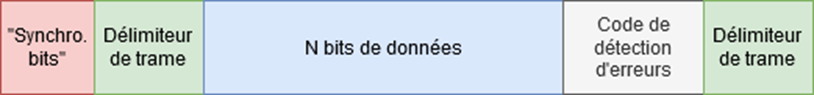

In [5]:
#On redéfinit c pour qu'il soit considéré comme un tableau pour pouvoir l'additionner avec d'autre tableau
bit_parite = [bit_parite]

#On définit la valeur de notre fanion de départ et de celui de fin
fanion1 = [0,1,1,1,1,1,1,0]
fanion2 = [0,1,1,1,1,1,1,0]


#On ajoute nos fanions ainsi que notre bit de parité au message binaire afin de former une trame
Trame = fanion1 + message_tab + bit_parite + fanion2

#On affiche notre trame
print ("La trame sera de la forme suivante:",Trame)

La trame sera de la forme suivante: [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]


## 1.4 CONTROLE DE REDONDANCE CYCLIQUE (EMETEUR) 

Le contrôle de redondance cyclique (noté CRC, ou en anglais Cyclic Redundancy Check) est un moyen de contrôle d'intégrité de la trame. Il représente la principale méthode de détection d'erreur utilisée dans les télécommunications.

Le principe du CRC consiste à traiter les séquences binaires comme des polynômes binaires, c'est-à-dire des polynômes dont les coefficients correspondent à la séquence binaire.


In [6]:
# Suite d'instruction qui permet de transformer un tableau de donées en chaine de caractère
trame = "".join(["0" if i==0 else "1" for i in Trame])

# Fonction qui effectue l'opération logique d'un ou exclusif
def xor(a, b): 
   
    # initialiser le résultat
    result = [] 
    # si les bits sont idem, alors XOR vaut 0, sinon 1
    for i in range(1, len(b)): 
        if a[i] == b[i]: 
            result.append('0') # l'instruction .append() permet d'ajouter un élément dans un tableau ou liste
        else: 
            result.append('1') 
   
    return ''.join(result) 
   
# Fonction qui effectue la division euclidienne modulo 2
def mod2div(divident, divisor): 
   
    # Nombre de bits.
    pick = len(divisor) 
    
   
    tmp = divident[0 : pick] 
   
    while pick < len(divident): 
   
        if tmp[0] == '1': 
        
        
            tmp = xor(divisor, tmp) + divident[pick] 
   
        else:    
            tmp = xor('0'*pick, tmp) + divident[pick] 
    
        pick += 1
    
    if tmp[0] == '1': 
        tmp = xor(divisor, tmp) 
    else: 
        tmp = xor('0'*pick, tmp) 
   
    checkword = tmp 
    return checkword 
    

# Fonction utilisée du côté de l'expéditeur pour encoderles données en ajoutant le reste de la division modulaire à la fin des données.
# On lui donne les données (augmentée de N-bits 0 qui est la taille de la clé) et la clé (Key) qui (polynome générateur)

def encodageData(data, key): 
    l_key = len(key) 
    
    # Ajoute n-1 zéros à la fin des données.
    appended_data = data + '0'*(l_key-1) 
    remainder = mod2div(appended_data, key) 
   
    # Ajouter le reste dans les données originales
    codeword = data + remainder 
    return codeword


key= '10011'
print("Les données à envoyer sont :",trame)

print ("La clé CRC est:", key)

# # On réalise l'encodage CRC
# data_crc= encodeData(data,key)

crc = encodageData(trame,key)
# print("Encoded data for transmission: ", Encoded_data)
crc = [0 if i=="0"else 1 for i in crc]

print ("Les données encodées avec la clé key sont :",crc)

Les données à envoyer sont : 01111110010000010111010001100001011000100110110001100101101111110
La clé CRC est: 10011
Les données encodées avec la clé key sont : [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]


## 1.5 ENCODAGE MANCHESTER
Pour coder le signal en Manchester , il faut faire une boucle avec un pas de 1. On commence par 0 et on fait 1 boucle pour chaque bit du message. Dans cette boucle on met une fonction if qui dit vérifie le bit de la matrice: si le bit est 0, alors on met un 0 puis un 1 dans notre nouvelle matrice, sinon (si le bit est 1) on met un 1 puis un 0.

Au final l'information encodée deviendra illisible pour une tierce personne.

In [7]:
codeManchester = [] # Initialisation de la matrice

for i in range (0,len(crc)):  # Boucle qui va de 0 au nombre total de bits du message
    if crc[i]==0:             # Si le bit est 0
 
        codeManchester.append(0)  # Bit de l'information
        codeManchester.append(1)  # Bit de codage (sans réel sens)
 
    else:                         # Si le bit est 1
 
        codeManchester.append(1)  # Bit de l'information
        codeManchester.append(0)  # Bit de codage (sans réel sens)
        
print ("Les données codées en Manchester donnent:", codeManchester)

Les données codées en Manchester donnent: [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]


## 1.6  MODULATION AU CHOIX ASK OU FSK

Modulation au choix ASK ou FSK de la trame encodée en manchester. 

Veuillez saisir le type de modulation souhaiter(ASK ou FSK tout en majuscule):FSK


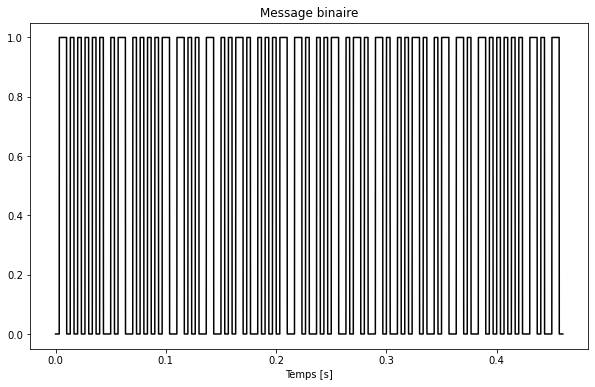

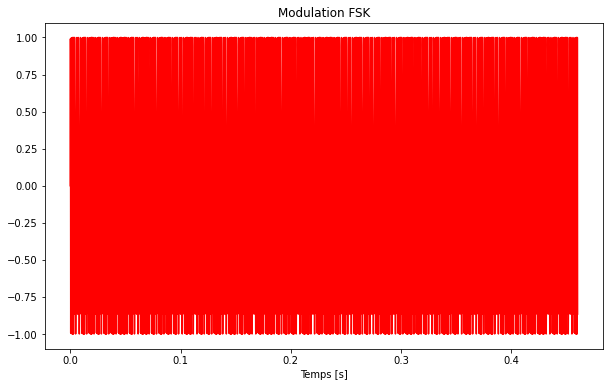

In [8]:
M =  codeManchester                 # Message binaire M

Fe =  44100                         # Fréquence d'échantillonnage                        
baud = 300                          # Débit souhaité sur le canal de transmission exprimé en bit/s
Nbits =  len(M)                        # Nombre de bits initial (taille du message M)
Ns = int(Fe/baud)                            # Nombre de symboles par bit (Fréq d'echan / Débit binaire) 
N = int(Ns*Nbits)                             # Nombre de bits total à moduler (Nombre de symboles par bit * Nombre de bits

# On génère le message binaire dupliqué
M_duplique= np.repeat(M,Ns)             # l'instruction repeat() permet de duliquer une données

Choix = str(input("Veuillez saisir le type de modulation souhaiter(ASK ou FSK tout en majuscule):"))

if Choix == "ASK" : # condition qui vérifie que la chaine de caractère entrer est ASK
    # On génère le vecteur temps
    t = np.linspace(0,N/Fe,N)                        

    # On génère la porteuse P(t)
    Ap = 1                     
    Fp =20000                        # Fréquence de l'onde porteuse 
    Porteuse = Ap*np.sin(2*np.pi*Fp*t)             

    # On réalise la modualtion en amplitude  
    ASK =  M_duplique*Porteuse                

   
    #Affichage du message M

    plt.figure (figsize = (10,6))
    plt.plot(t,M_duplique,'black')
    plt.title('Message binaire')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.grid()

    #Affichage de la porteuse 

    plt.figure (figsize = (10,6))
    plt.plot(t,Porteuse,'b')
    plt.title('Porteuse P(t)')
    plt.xlim(0,0.020)
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.grid()

    #Affichage du résultat de la modualtion ASK

    plt.figure (figsize = (10,6))
    plt.plot(t,ASK,'r')
    plt.title('Modulation ASK')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    
if Choix == "FSK": # condition qui vérifie que la chaine de caractère entrer est FSK
    
    # Génération des 2 porteuse P1 pour le bit 1 et P2 pour le bit 0

    A1 = 1                                                 # amplitude de la porteuse du bit 1                           
    A2 = 1                                                 # amplitude de la porteuse du bit 0
    fp1 = 500                                              # fréquence de la porteuse du bit 1
    fp2 = 2000                                             # fréquence de la porteuse du bit 0
    t1 = np.linspace (0.0,Ns/Fe,Ns)   # on peut aussi le générer avec la commande arange    t = np.arange (0.0,Ns)/Fe

        # On génère le vecteur temps t

    t = np.linspace (0.0,N/Fe,N)      # on peut aussi le générer avec la commande arange    t = np.arange (0.0,N)/Fe
    # On génère des porteuses d'une longueur correspondant à Ns

    P1 = [A1*np.sin(2*np.pi*fp1*tt) for tt in t1]          # porteuse du bit 1  
    P2 = [A2*np.sin(2*np.pi*fp2*tt) for tt in t1]          # porteuse du bit 0

    # On réalise la modulation FSK

    FSK = []

    for n in range(0,len(M)):
        if (M[n] == 1):
            FSK.extend(P1) # l'instruction .extend() permet d’étendre la liste en ajoutant tous les éléments à l’itérable.
        else:
            FSK.extend(P2)

    # Affichage du Message binaire et le résultat de la modulation FSK

    plt.figure (figsize = (10,6))
    plt.plot(t,M_duplique,'black')
    plt.xlabel('Temps [s]')
    plt.title('Message binaire')

    plt.figure (figsize = (10,6))
    plt.plot(t,FSK,'r')
    plt.xlabel('Temps [s]')
    plt.title('Modulation FSK')

    plt.show()
    



In [9]:
# Enregistrement du message dans un fichier son
if Choix == "ASK": # condition qui vérifie que la chaine de caractère entrer est ASK
    write("message_son.wav",Fe,ASK) # l'instruction white() permet d'enregistrer une données dans un fichier wav
    
if Choix == "FSK": # condition qui vérifie que la chaine de caractère entrer est FSK
    FSK = np.array(FSK,np.float32) # l'instruction np.array() permet de creer un tableau
                                   # l'instruction np.float32 définit le type de donées qui sont dans le tableau 
    write("message_son.wav",Fe,FSK)


_,analogue_message = read('message_son.wav')
sd.play(analogue_message, Fe)# L'instruction sd.play permet de jouer le son d'un fichier
status = sd.wait() # Attendre la fin du son

# 2. PHASE DE RECEPTION

 Lecture du fichier audio.

In [10]:
_,ecoute_message = read('message_son.wav') # l'instruction read() permet de lire un fichier.

## 2.1 FILTRAGE DU SIGNAL RECU PAR UN FILTRE PASSE-BANDE

Nous effectuerons le filtre du signal reçu. Dans notre prototype, nous n'en avons pas besoin mais il est toujours bon de savoir comment cela fonctionne.
Exemple de filtrage du signal électrique par un filtre passe-bande afin d'atténuer les signaux parasites dans le réseau.


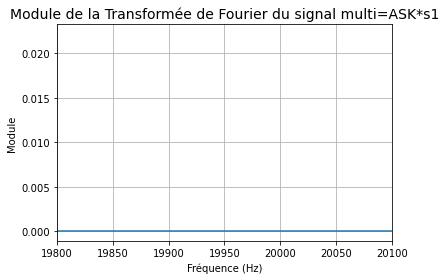

In [11]:
# Création d'une sinusoïde qui aura le rôle du signal parasite.

Freq_echant = 44100
A = 1
f = 150 # fréquence  qui correspond à la voie
d = 1
t2 = np.linspace(0,N/Fe,N)  

s1 = A*np.sin(2*np.pi*f*t2)

multi = ecoute_message * s1

 # Initialisation de la fréquence d'échantillonage de 44100 Hz.
f,FFT = periodogram(multi,Freq_echant) # Calcul de la transformée de Fourier avec la fonction periodogram.

# # Affichage du de la transformée de Fourier FFT du signal -----------------

plt.plot(f,FFT)
plt.xlim(19800,20100) # affichage via la fonction plot de Matplotlib.
plt.xlabel('Fréquence (Hz)')        # définition de l'axe des abscisses.
plt.ylabel('Module')                # définition de l'axe des ordonnées.
plt.grid()
plt.title ('Module de la Transformée de Fourier du signal multi=ASK*s1',fontsize=14)
plt.show() 


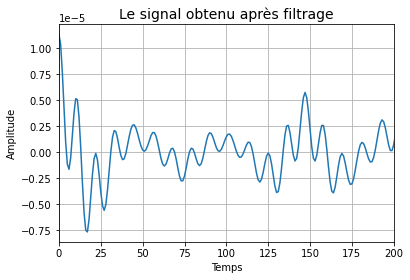

In [12]:
fc1 = 18000 # Première fréquence de coupure.
fc2 = 20100 # Deuxième fréquence de coupure.

FFT_filtre = FFT # Assignassion de la valeur du calcul de la transformer de fourier à une nouvelle variable.
for i in range(len(f)):
    if f[i] < fc1 and f[i] > fc2: # on coupe toutes les fréquences inférieur à 8000 Hz et supérieur à 30000 Hz. 
        FFT_filtre[i] = 0.0
        
# on calcule la transfomrée de Fourier inverse du signal après filtrage en utilsant la fonction ifft de Python.
# la FFT inverse permet de revenir dans l'espace temporal (espace fréquentiel -> espace temps).
        
FFT_inverse = np.fft.ifft(FFT_filtre)

# le résulat étant un nombre complexe, il nous faut représenter que la partie réelle, imaginaire ou le module.

T = np.real(FFT_inverse) # l'instruction np.real() permet la conversion de nombre complexe en nombre réel.

# # Affichage du de la partie réelle du calcule de la transformer de Fourier inverse -----------------

plt.plot(T)         # affichage via la fonction plot de Matplotlib de la partie réelle
plt.ylabel('Amplitude')# définition de l'axe des ordonnées
plt.xlabel('Temps') 
plt.xlim(0, 200)
plt.grid()
plt.title ('Le signal obtenu après filtrage',fontsize=14)
plt.show()     

# 2.2 DEMODULATION ASK OU FSK

Démodulation au choix ASK ou FSK du signal binaire.

In [13]:
if Choix == "ASK": # condition qui vérifie que la chaine de caractère entrer est ASK
    S = Porteuse                      # générer la porteuse déja utilisée plus haut lors de la modulation (nommée Porteuse)

    Produit = ecoute_message*S               # multiplier le signal modulé par la signal de la porteuse S1 (bit 1)

    recu = []                                # Résulat de l'intégration                         
    # Intégration des 2 résultats bit1 sur période de T = [0, Ns], Ns: taille du symbole envoyé 
    # par la méthode des trapèzes (fonction numpy.trapz en Python).

    i = 0
    for i in range(0,N,Ns):
        recu.append(np.trapz(Produit[i:i+Ns]))
    print(recu)



    plt.figure (figsize = (10,6))
    plt.plot(recu[:50])
    plt.show()
    
if Choix == "FSK": # condition qui vérifie que la chaine de caractère entrer est FSK
    Porteuse1 = np.tile(P1,Nbits)                # Porteuse du bit 1  
    Porteuse2 = np.tile(P2,Nbits)                # Porteuse du bit 0 

    bit1 = FSK*Porteuse1                         # Multiplier le signal modulé par la signal de la porteuse P1 (bit 1)
    bit0 = FSK*Porteuse2                         # Multiplier le signal modulé par la signal de la porteuse P2 (bit 0)

    # Intégration des 2 résultats bit1 et bit0 sur période de T = [0, Ns], Ns: taille du symbole envoyé 
    # par la méthode des trapèzes (fonction numpy.trapz en Python).

    y1 = []                                      # Résulat de l'intégration du bit1                            
    y2 = []                                      # Résulat de l'intégration du bit0

    i=0

    for i in range(0,N,Ns):
        y1.append(np.trapz(bit1[i:i+Ns]))
        y2.append(np.trapz(bit0[i:i+Ns]))

In [14]:
# Transformation du signal démoduler en suite de 0 et de 1
if Choix == "ASK":
    trame_demodule_ASK = []
    for ii in range (0,len(recu)):
        if recu[ii] > 0:
            trame_demodule_ASK.extend([int(1)]) 
        if recu[ii] <= 0:
            trame_demodule_ASK.extend([int(0)])
            
if Choix == "FSK":
    trame_demodule_FSK = []

    for ii in range (0,len(y1)):
        if abs(y1[ii]) > abs(y2[ii]):
            trame_demodule_FSK.extend([int(1)]) 
        if abs(y1[ii]) <= abs(y2[ii]):
            trame_demodule_FSK.extend([int(0)]) 


## 2.3 DECODAGE MANCHESTER

Décodage de la trame avec le codage Manchester. Le bit de l'information étant en premier nous faisons une boucle qui a un pas de 2, le bit indiqué par cette boucle sera à chaque fois intégré dans une variable tableau, ce qui éliminera 1 bit sur 2.

In [15]:
""" Décodage du signal binaire """

if Choix == "ASK":            
    trame_decode = [int(trame_demodule_ASK[i]) for i in range(0, len(trame_demodule_ASK),2)]
    print("La trame décodée par le codage manchester est la suivante:",trame_decode)

if Choix == "FSK":
    trame_decode = [int(trame_demodule_FSK[i]) for i in range(0, len(trame_demodule_FSK),2)]
    print("La trame décodée par le codage manchester est la suivante:",trame_decode)

La trame décodée par le codage manchester est la suivante: [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]


## 2.4 RECUPERATION DE LA TRAME APRES DECODAGE

In [16]:
""" Transformation du tableau en chaîne de caractère """

trame_decoder = "".join(["0" if i==0 else "1" for i in trame_decode]) 
print("Voici la trame : ",trame_decoder)

Voici la trame :  011111100100000101110100011000010110001001101100011001011011111101101


## 2.5 CONTROLE DE REDONDANCE CYCLIQUE (RECEPTEUR)

In [17]:
""" Décodage de la trame avec le controle de redondance cyclique """

# Fonction qui effectue l'opération logique d'un ou exclusif 
def xor(a, b): 
   
    # initialiser le résultat
    result = [] 
   

    # si les bits sont idem, alors XOR vaut 0, sinon 1
    for i in range(1, len(b)): 
        if a[i] == b[i]: 
            result.append('0') 
        else: 
            result.append('1') 
   
    return ''.join(result) 
   
# Fonction qui effectue la division euclidienne modulo 2
def mod2div(divident, divisor): 
   
    pick = len(divisor) 
    tmp = divident[0 : pick] 
   
    while pick < len(divident): 
   
        if tmp[0] == '1': 

            tmp = xor(divisor, tmp) + divident[pick] 
   
        else:    
            tmp = xor('0'*pick, tmp) + divident[pick] 
    
        pick += 1
    
    if tmp[0] == '1': 
        tmp = xor(divisor, tmp) 
    else: 
        tmp = xor('0'*pick, tmp) 
   
    checkword = tmp 
    return checkword 

# Fonction utilisée du côté du récepteur pour décoder les données reçues par l'expéditeur 
# On donne la focntion décodeData les données encodées en CRC et la clé utilisée
def decodeData(data_crc, key): 
   
    l_key = len(key) 
    
    # Ajoute n-1 zéros à la fin des données.
    appended_data = data_crc + '0'*(l_key-1) 
    remainder = mod2div(appended_data, key) 
   
    return remainder 



key= '10011'   # On utilise la même clé à l'émission (polynome générateur)
check = decodeData(trame_decoder, key) 



print("Le reste de la division après décodage est ->"+check) 
temp = "0" * (len(key) - 1) 


if check == temp: 
    print("Super! les données -> "+trame_decoder+ " <- sont bien reçues dans leurs intégraliter!") 
else: 
    print ("Erreur de réception !") 


Le reste de la division après décodage est ->0000
Super! les données -> 011111100100000101110100011000010110001001101100011001011011111101101 <- sont bien reçues dans leurs intégraliter!


## 2.6 RECUPERATION DU MESSAGE DE LA TRAME

In [18]:
#On supprime nos fanions afin de garder seulement notre message encode avec le controle de redondance cyclique
del trame_decode[(len(trame_decode)-12):(len(trame_decode))]
del trame_decode[0:8]

In [19]:
""" Transformation du tableau en chaîne de caractère """

trame = "".join(["0" if i==0 else "1" for i in trame_decode])
print("Voici la message sans les fanions de début et de fin : ",trame)

Voici la message sans les fanions de début et de fin :  0100000101110100011000010110001001101100011001011


## 2.7 VERIFICATION DE L'INTEGRITE DU MESSAGE AVEC LE  BIT DE PARITE

In [20]:
#On calcul le bit de parité lors de la récéption du signal

c1=0
i=0

#On supprime le dernier bit de la trame (elle correspond au bit de parité)
del trame_decode[-1]

#On calcul le bit de parité
for i in range(len(trame_decode)):
    if trame_decode[i]==1:
        c1 = c1+1 
    else:
        c1 = c1
        
        
# Vérification qu'il n'y a d'erreur à la réception du message        
if c1 == c:
    print("Il n'y a pas d'erreur de réception :", trame_decode)
else :
    print("Il y a une erreur")


Il n'y a pas d'erreur de réception : [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]


## 2.8 CONVERSION DU MESSAGE BINAIRE EN CHAINE DE CARACTERE

In [21]:
# Transformation du tableau en chaine de caractère.

bin_data = ""
for elem in trame_decode:  
    bin_data += str(elem)
    
data_reçu =' '

# Fonction BinarytoDecimal() function (conversion bianire ==> décimal)
def BinaryToDecimal(binary):  
    binary1 = binary 
    decimal, i, n = 0, 0, 0 #initialisation des variables
    
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return (decimal)


# Découper les données binaire d'entrée et la convertir en décimal puis la convertir en chaîne par bloc de 8 
for i in range(0, len(bin_data), 8): 
    # découper le bin_data de la plage d'index [0, 7] (car une caractère ASCII est codé sur 7 bits) ett le stocker sous forme d'entier dans temp_data
    temp_data = int(bin_data[i+1:i+8])
      
       
    # Passer (temp_data) dans la fonction BinarytoDecimal ()
    # pour obtenir la valeur décimale correspondante de (temp_data)
    decimal_data = BinaryToDecimal(temp_data)

    # Décodage de la valeur décimale renvoyée par
    # la Fonction BinarytoDecimal (), en utilisant chr ()
    # fonction qui renvoie la chaîne correspondante
    # caractère pour une valeur ASCII donnée et enregistrez-le
    # dans data_recu
    data_reçu = data_reçu + chr(decimal_data) 

# Affichage du result 
print("Le message reçu est :",data_reçu) 

Le message reçu est :  Atable


# CONCLUSION

Pour conclure, nous avons crée un programme qui simulera la chaine de transmission de l'envoi à la réception du message de l'agent. Avec ce dernier, il pourra communiquer de manière optimale et en toute discrétion !

## BILAN INDIVIDUEL


__Sény :__
Ce dernier livrable a été satisfaisant à réaliser. J'ai beaucoup aimer programmer la chaine transmission de notre prototype. Lorsqu'un des membres de mon équipe était en difficulter, j'ai pu lui donner l'aide dont il avait besoin. Je suis fier de mon équipe, ils ont donner le meilleur d'eux même afin d'aider à la réalisation de ce projet.

__Jeremy :__
Ce dernier livrable fut compliqué à réaliser, il a fallu nous y reprendre à plusieurs fois afin que le code fonctionne parfaitement. Faire en même temps, ce code, le livrable3 et la préparation de la soutenance à demandé une grande organisation au sein de l'équipe, ce qui nous a permit de terminer à temps. Travaillé avec ce groupe fut un plaisir pour ma part, nous étions tous investi dans le  projet et ce jusqu'au bout.

__Hugo :__
Dernier livrable du projet ! Je dois avouer que c'est celui que j'ai le moins apprécié, notamment en raison des notions demandées (Python), mais je pense néanmoins avoir acquis de modestes bases. Avoir eu à le réaliser en même temps que le livrable 3 ne fut pas une mince affaire, mais grâce à notre esprit de cohésion nous avons su tout gérer et (je pense) bien nous en sortir. Concernant le bloc en lui-même, je l'ai assez apprécié en raison de ce qu'il a pu m'apporter (comme les équations différentielles, les circuits de filtrage et tout ce qui s'en suit...) et j'espère avoir l'occasion de m'épanouir d'avantage dans les prochains blocs !

__Eloi :__
Ce quatrième et dernier livrable, fut particulièrement compliqué surtout que nous devions le faire en parallèle du livrables 3 ainsi que la soutenance et je ne parle même pas des CCTL. celui-ci était le plus compliqué du projet j’ai beaucoup de mal sur python mais heureusement, comme je l’ai dit sur le dernier bilan personnel, que j’ai des camarades qui m’ont très bien expliqué et donc comprendre tout.